# Ilots EthnoBotaniques - Ilots de Chaleur Urbains (ICU)

Data analysis for temperature measurements on the stone _vs._ green wall of the fort at Sainte-Hélène island, between June 28 and July 19 2023.

Sensor Elitech RC-5 identified by serial numbers (SN)

- SNxxx51 on stone wall of the fort (temp_stone)
- SNxxx78 on the part covered by *Parthenocissus quinquefolia* (temp_plant)

Some time after our last data collection, July 19th, and July 26th, our two sensors were stolen from the wall.

In [1]:
import requests
import pandas as pd
from geopy.geocoders import Nominatim
import seaborn as sns
import plotly.express as px

date_stamp  = '20230719'
date_format = "%Y-%m-%d %H:%M%S"
temp_stone  = f'data/EFE231100351_{date_stamp}.xlsx'
temp_plant  = f'data/EFE231100378_{date_stamp}.xlsx'


In [2]:
geolocator = Nominatim(user_agent="hien_foo")
montreal = geolocator.geocode("Montreal, Quebec, Canada")
lat = montreal.latitude
lon = montreal.longitude

print(f"{lat}, {lon}")

45.5031824, -73.5698065


In [3]:
# https://www.thepythoncode.com/article/interactive-weather-plot-with-matplotlib-and-requests

# Get the temperatures of a given location
#
#response = requests.get(f'https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m')
end_date = '2023-07-19'
response = requests.get(f"https://archive-api.open-meteo.com/v1/era5?latitude={lat}&longitude={lon}&start_date=2023-06-29&end_date={end_date}&hourly=temperature_2m")
temperatures = response.json().get('hourly')['temperature_2m']
datetimes = response.json().get('hourly')['time']
df_meteo_mtl = pd.DataFrame({'Dates': datetimes, 'Temperatures OpenMeteo': temperatures})
#df_meteo_mtl
df_meteo_mtl['Dates'] = pd.to_datetime(df_meteo_mtl['Dates'])
print(type(df_meteo_mtl['Dates'][0]))
df_meteo_mtl

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Dates,Temperatures OpenMeteo
0,2023-06-29 00:00:00,20.1
1,2023-06-29 01:00:00,19.7
2,2023-06-29 02:00:00,19.3
3,2023-06-29 03:00:00,19.0
4,2023-06-29 04:00:00,18.8
...,...,...
499,2023-07-19 19:00:00,24.3
500,2023-07-19 20:00:00,24.4
501,2023-07-19 21:00:00,24.3
502,2023-07-19 22:00:00,24.0


<Axes: xlabel='Dates'>

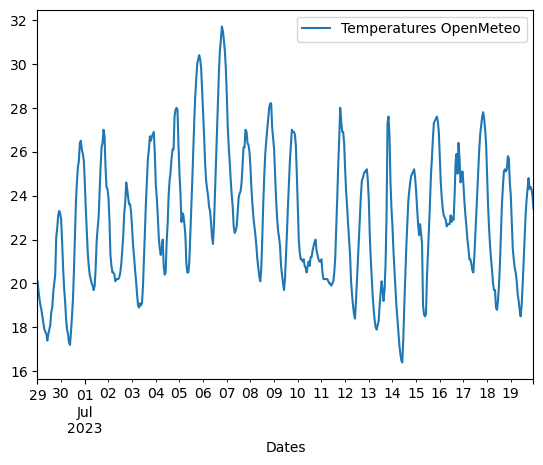

In [4]:
df_meteo_mtl.plot(x='Dates', y='Temperatures OpenMeteo')

In [5]:
df78 = pd.read_excel(temp_plant, skiprows=28, usecols=[1, 2])
df78.columns = ['Dates', 'Temperatures on plant']
df78['Dates'] = pd.to_datetime(df78['Dates'])
df78.head()

,Dates,Temperatures on plant
0,2023-06-28 14:46:48,22.3
1,2023-06-28 15:01:48,21.9
2,2023-06-28 15:16:48,21.3
3,2023-06-28 15:31:48,21.3
4,2023-06-28 15:46:48,20.9


In [6]:
df51 = pd.read_excel(temp_stone, skiprows=28, usecols=[1, 2])
df51.columns = ['Dates', 'Temperatures on stone']
df51['Dates'] = pd.to_datetime(df51['Dates'])
df51.tail()

,Dates,Temperatures on stone
1997,2023-07-19 10:01:48,28.6
1998,2023-07-19 10:16:48,29.3
1999,2023-07-19 10:31:48,29.9
2000,2023-07-19 10:46:48,30.3
2001,2023-07-19 11:01:48,31.2


In [7]:
df = pd.merge(df78, df51, on='Dates')
df.describe()

,Temperatures on plant,Temperatures on stone
count,2002.000000,2002.000000
mean,24.280519,25.453047
std,4.201043,5.395694
min,17.600000,17.600000
25%,21.000000,21.200000
50%,23.300000,23.800000
75%,27.000000,28.575000
max,38.800000,41.700000


In [29]:
df['Difference'] = df['Temperatures on stone'] - df['Temperatures on plant']
df

,Dates,Temperatures on plant,Temperatures on stone,Difference
0,2023-06-28 14:46:48,22.3,21.9,-0.4
1,2023-06-28 15:01:48,21.9,22.6,0.7
2,2023-06-28 15:16:48,21.3,22.4,1.1
3,2023-06-28 15:31:48,21.3,22.2,0.9
4,2023-06-28 15:46:48,20.9,21.8,0.9
...,...,...,...,...
1997,2023-07-19 10:01:48,28.3,28.6,0.3
1998,2023-07-19 10:16:48,28.7,29.3,0.6
1999,2023-07-19 10:31:48,29.0,29.9,0.9
2000,2023-07-19 10:46:48,28.7,30.3,1.6


<Axes: xlabel='Dates'>

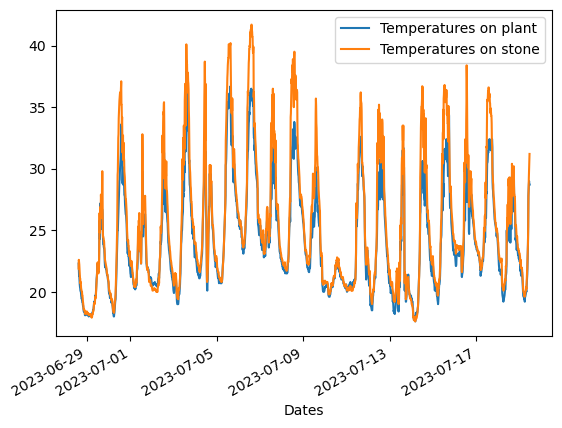

In [30]:
df.plot(x='Dates', y=['Temperatures on plant', 'Temperatures on stone'])

In [31]:
fig = px.line(df, x="Dates", y=df.columns,
              title='Temperatures on the wall of the fort')
fig.write_image('temperatures_by_sensors.png')
fig.show()
fig.write_image("temperatures_by_sensors.png")

In [32]:
df1 = pd.concat([df, df_meteo_mtl])
df1

,Dates,Temperatures on plant,Temperatures on stone,Difference,Temperatures OpenMeteo
0,2023-06-28 14:46:48,22.3,21.9,-0.4,NaN
1,2023-06-28 15:01:48,21.9,22.6,0.7,NaN
2,2023-06-28 15:16:48,21.3,22.4,1.1,NaN
3,2023-06-28 15:31:48,21.3,22.2,0.9,NaN
4,2023-06-28 15:46:48,20.9,21.8,0.9,NaN
...,...,...,...,...,...
499,2023-07-19 19:00:00,NaN,NaN,NaN,24.3
500,2023-07-19 20:00:00,NaN,NaN,NaN,24.4
501,2023-07-19 21:00:00,NaN,NaN,NaN,24.3
502,2023-07-19 22:00:00,NaN,NaN,NaN,24.0


In [72]:
fig1 = px.line(df1, x="Dates", y=['Temperatures on plant', 'Temperatures on stone', 'Temperatures OpenMeteo'],
              title='Temperatures on the wall of the fort')
fig1.show()
fig1.write_image("temperatures_by_sensors_and_meteo.png")

In [35]:
df1['Dates']

0     2023-06-28 14:46:48
1     2023-06-28 15:01:48
2     2023-06-28 15:16:48
3     2023-06-28 15:31:48
4     2023-06-28 15:46:48
              ...        
499   2023-07-19 19:00:00
500   2023-07-19 20:00:00
501   2023-07-19 21:00:00
502   2023-07-19 22:00:00
503   2023-07-19 23:00:00
Name: Dates, Length: 2506, dtype: datetime64[ns]

In [65]:
df_gt_25 = df.loc[df['Temperatures on plant'] >= 25]
df_gt_25.head()

,Dates,Temperatures on plant,Temperatures on stone,Difference
93,2023-06-29 14:01:48,25.8,26.4,0.6
96,2023-06-29 14:46:48,26.5,26.7,0.2
97,2023-06-29 15:01:48,27.2,26.9,-0.3
98,2023-06-29 15:16:48,26.9,26.3,-0.6
99,2023-06-29 15:31:48,27.1,27.9,0.8


In [68]:
print(df_gt_25.describe())
#fig1 = px.violin(df, y=df.columns, x="Dates", color="sex", box=True, points="all",
fig25 = px.violin(df_gt_25, y=['Temperatures on stone', 'Temperatures on plant'], box=True, points='all')
fig25.show()

       Temperatures on plant  Temperatures on stone  Difference
count             766.000000             766.000000  766.000000
mean               28.763185              31.163708    2.400522
std                 2.902012               4.094302    1.743634
min                25.000000              24.800000   -1.500000
25%                26.300000              27.700000    1.000000
50%                28.100000              30.400000    2.000000
75%                30.700000              34.500000    3.800000
max                38.800000              41.700000    6.700000


In [60]:
col_temp = []
col_diff = []
for t in range(25, 41):
    df_t = df.loc[df['Temperatures on plant'] >= t]
    print(f"Dataset for temperatures above {t}")
    print(df_t.describe())
    col_temp.append(t)
    col_diff.append(df_t['Difference'].mean())


Dataset for temperatures above 25
       Temperatures on plant  Temperatures on stone  Difference
count             766.000000             766.000000  766.000000
mean               28.763185              31.163708    2.400522
std                 2.902012               4.094302    1.743634
min                25.000000              24.800000   -1.500000
25%                26.300000              27.700000    1.000000
50%                28.100000              30.400000    2.000000
75%                30.700000              34.500000    3.800000
max                38.800000              41.700000    6.700000
Dataset for temperatures above 26
       Temperatures on plant  Temperatures on stone  Difference
count             624.000000             624.000000  624.000000
mean               29.518429              32.214904    2.696474
std                 2.691166               3.791710    1.747078
min                26.000000              25.900000   -1.500000
25%                27.300000        

In [62]:
df_mean_diff = pd.DataFrame.from_dict({'Temperatures greater than': col_temp, 'Mean of differences': col_diff})
df_mean_diff

,Temperatures greater than,Mean of differences
0,25,2.400522
1,26,2.696474
2,27,2.951176
3,28,3.200253
4,29,3.444409
5,30,3.628571
6,31,3.706780
7,32,3.717544
8,33,3.759375
9,34,3.679167


In [71]:
fig_diff = px.line(df_mean_diff, x="Temperatures greater than", y="Mean of differences", title='Mean differences at temperatures greater than')
fig_diff.show()
fig_diff.write_image('temperatures_diff_means.png')

In [70]:
for t in range(25, 40):
    df_t = df.loc[df['Temperatures on plant'] >= t]
    fig_t = px.violin(df_t, y=['Temperatures on stone', 'Temperatures on plant'], title=f'Differences at temperatures greater than {t} degrees C', box=True, points='all')
    fig_t.show()
    fig_t.write_image(f'temperatures_diff_{t}.png')
